In [108]:
import numpy as np
import matplotlib.pyplot as plt


#Se utiliza funciones vistas en clases 

def spline_coefs(puntos):
    
    n = len(puntos) - 1
    
    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]
    
    a = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])
        
        
    # Se resuelve un sistema de ecuaciones:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    return a, b, c, d

def spline_eval(x, coefs, puntos):

    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_ind(x, puntos)
    a, b, c, d = coefs
    return (a[i] + b[i]*(x - puntos[i][0]) + \
            c[i]*(x - puntos[i][0])**2 + d[i]*(x - puntos[i][0])**3)

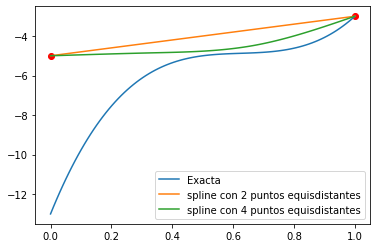

In [123]:
#Para hacer primer spline con 2 puntos
mini = 0
maxi = 1
order = 2
xp = np.linspace(mini, maxi, order)
puntos = np.array([[xi, np.array(4*xi**3 -3*xi**2+ xi - 5)] for xi in xp])
coefs= spline_coefs(puntos)

x = np.linspace(mini, maxi, 100)
spline = [spline_eval(xi, coefs, puntos) for xi in x]

#Para hacer segundo spline con 4 puntos
order1=4
xp1 = np.linspace(mini, maxi, order1)
puntos1 = np.array([[xi, np.array(4*xi**3 -3*xi**2+ xi - 5)] for xi in xp1])
coefs1= spline_coefs(puntos1)

spline1 = [spline_eval(xi, coefs1, puntos1) for xi in x]

#Se grafica
plt.scatter(puntos[:,0], puntos[:,1], color='red')
plt.plot(x, exact,label="Exacta")
plt.plot(x, spline,label='spline con 2 puntos equisdistantes')
plt.plot(x, spline1,label='spline con 4 puntos equisdistantes')
plt.legend()
plt.show()

Se observa que la peor aproximacion es la de 2 puntos equisdistantes, mintras que con 4 puntos equisdistantes se acerca mas pero sigue con bastante diferencia